In [1]:
import astropy
from astropy.wcs import WCS
from astropy import wcs
from astropy.io import fits, ascii
from astropy.coordinates import Angle, SkyCoord
from astropy.nddata import Cutout2D
import astropy.units as un
import numpy as np
import pandas as pd

import matplotlib
from matplotlib.patches import Ellipse, Rectangle
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator, FixedFormatter

import current.plot_fqns
from current.plot_fqns import beam, load, info, cut, scale, beam_plotter, sbar_plotter
import warnings
warnings.filterwarnings("ignore");

#### Gaia

In [2]:
gaia_df = pd.read_csv('1688075645690O-result.csv', delimiter=',');
v1674her_df = gaia_df.iloc[3];
v1674her_gaia = v1674her_df.to_dict();
#ra_pm = un.Quantity(v1674her_gaia['pmra'], unit=(un.mas/un.year));

gaia = SkyCoord(v1674her_gaia['ra'], v1674her_gaia['dec'], unit=(un.degree, un.degree), 
                obstime="J2016", pm_ra_cosdec=(v1674her_gaia['pmra']*(un.mas/un.year)), 
                pm_dec=(v1674her_gaia['pmdec']*(un.mas/un.year)));

ra_err = (v1674her_df['dec_error']*un.mas).to(un.degree).value;
dec_err = (v1674her_df['ra_error']*un.mas).to(un.degree).value;
rapm_err = (v1674her_df['pmra_error']*un.mas).to(un.degree).value;
decpm_err = (v1674her_df['pmdec_error']*un.mas).to(un.degree).value;

gaia_xerr = (ra_err**2+rapm_err**2)**(1/2);
gaia_yerr = (dec_err**2+rapm_err**2)**(1/2);
# shifted_gaia_tmp = gaia.apply_space_motion(new_obstime=astropy.time.Time(imgb_info['obs_date']));
# shifted_gaia = shifted_gaia_tmp.transform_to('fk5'); #AIPS uses FK5
gaia

FileNotFoundError: [Errno 2] No such file or directory: '1688075645690O-result.csv'

#### Difmap Center from V1674HERB

In [3]:
old_difmap = SkyCoord(284.3790725790, 16.8943023350, unit=(un.degree, un.degree), 
                obstime="J2000", frame='fk5'); #the coordinates come from the difmap fit
difmap = SkyCoord(284.3790727910, 16.8943022807, unit=(un.degree, un.degree), 
                obstime="J2000", frame='fk5');
sep = (difmap.separation(gaia)).to_string(unit=un.degree, sep=':');
difmap.to_string('hmsdms')

'18h57m30.97746984s +16d53m39.48821052s'

In [4]:
difmapd = SkyCoord(284.3790728251, 16.8943023740, unit=(un.degree, un.degree),
                   obstime="J2000", frame='fk5');
difmap_nd = SkyCoord(284.3790728379, 16.8943024352, unit=(un.degree, un.degree), 
                     obstime="J2000", frame='fk5');
# print(difmap_nd.to_string('hmsdms'));

In [5]:
#fitted from difmap
major = (3.417e-02*un.arcsec).to(un.degree);
minor = (1.515e-02*un.arcsec).to(un.degree);
theta = 50.24*un.degree


### RMS

In [6]:
b_rms = 1.69e-02 #mJy/beam
d_rms = 1.38e-02
ft_rms = 1.291e-02
fnt_rms = 1.323e-02
h_rms = 7.409e-03
ft_peak = 26.678e-03
fnt_peak = 24.192e-03
ft1_rms = 1.316e-02
ft1_peak = 4.9394e-02
fnt1_rms = 1.587e-02
fnt1_peak = 5.933e-02

amount_ft = ft1_peak/ft1_rms
amount_fnt = fnt1_peak/fnt1_rms



### V1674HERB

In [7]:
imgb_data, wcsb, imageb = load('./V1674HERIMG/1031/V1674HERD_CLND2.fits');

imgb_info, centerb = info(imageb);
beamb = beam(imageb);

#tst_data, tst_wcs, tst_img, tst_aio = open('./V1674HERIMG/V1674HERB_CLN2.fits');

In [8]:
cutb_data, cut_wcsb, cutb_hdu, cutb_center = cut(imgb_data, wcsb, imageb, centerb, center_pos=difmap, box=(350,350));


shifted_gaia_tmp = gaia.apply_space_motion(new_obstime=astropy.time.Time(imgb_info['obs_date']));

shifted_gaia = shifted_gaia_tmp.transform_to('fk5');


In [9]:
sep = shifted_gaia.separation(difmap);
conv = (3600)**(-1)*(np.pi/180) #arcsec to rad
d = 6.3e3
theta = (10e-3)*conv
sep_dis = np.tan(sep.rad)*d
pc_au = 2.0626481e5
sep_au = sep_dis*pc_au
# f'{D_au:.2E}'
f'{sep.mas:.2E}' #169 AU or 27mas off

'2.68E+01'

In [53]:
# print(plt.style.available)
# print(plt.rcParams.find_all('color'))

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'dracula', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'presentation', 'presentation_dark', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
axes.edgecolor: black
axes.facecolor: white
axes.labelcolor: black
axes.titlecolor: black
axes3d.xaxis.panecolor: (0.95, 0.95, 0.95, 0.5)
axes3d.yaxis.panecolor: (0.9, 0.9, 0.9, 0.5)
axes3d.zaxis.panecolor: (0.925, 0.925, 0.925, 0.5)
boxplot.boxprops.color: black
boxplot.capprops.color: black
boxplot.flierprops.color: black
boxplot.flierprops.markeredgecolor: black
boxplot.flierprops.mark

In [91]:
# 

plt.style.use('/Users/mwilliam/astro/lib/python3.12/site-packages/matplotlib/mpl-data/stylelib/light.mplstyle');
# print(plt.rcParams)
# print(plt.rcParams.find_all('color'))
# matplotlib.matplotlib_fname() #gets you default rcfile
print(type(ra_b))
# plt.rcParams.keys

Bad value in file '/Users/mwilliam/astro/lib/python3.12/site-packages/matplotlib/mpl-data/stylelib/light.mplstyle', line 38 ('font.size:     medium '): Key font.size: Could not convert 'medium' to float


<class 'astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper'>


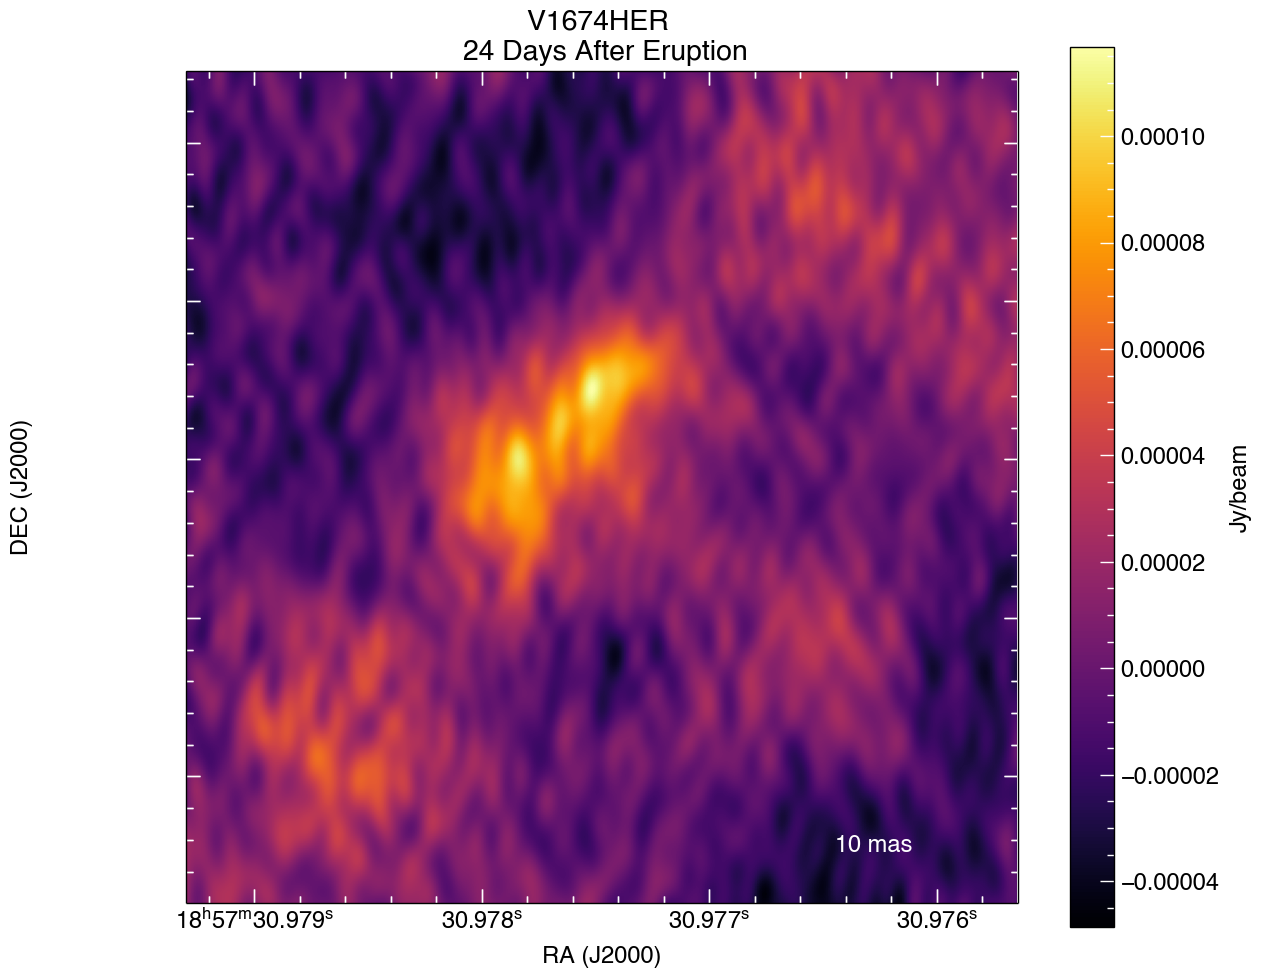

In [92]:
#intial stuff

# plt.rcParams.update({'font.size': 19});
# plt.rcParams.update({'font.weight': 'heavy'});
# plt.rcParams.update({'text.color': 'white'});

plt.rcParams.update({
    "text.usetex": False,

});

figb = plt.figure(figsize=(13,11));

axb = figb.add_axes([0.2, 0.2, 0.8, 0.8], projection=cut_wcsb);
ra_b = axb.coords[0];
dec_b = axb.coords[1];

axb.set_title(f'V1674HER \n 24 Days After Eruption');

# #axes ticks
# dec_b.display_minor_ticks(True);
# ra_b.display_minor_ticks(True);
# axb.tick_params(which='both', direction='in', color='white', length=17, width=2, pad=10.0);
# axb.tick_params(which='minor', length=7);


imgb = axb.imshow(cutb_data, cmap='inferno', vmin=imgb_info['min'], vmax=imgb_info['max'], 
                 transform=axb.get_transform(cut_wcsb), origin='lower');


# # contour_levels_array = np.array((-1.5, 2, 5, 7, 9, 11));
# # contour_levels = imgb_info['rms']*contour_levels_array;
# # # for spine in imgb.axes.spines.values():
# # #     spine.set_edgecolor('white');

cbar_b = figb.colorbar(imgb); 
cbar_b.ax.set_ylabel('Jy/beam'); 
# # # cbar_b.ax.yaxis.set_tick_params(color='white');
# # # cbar_b.outline.set_edgecolor('white');
# # plt.setp(plt.getp(cbar_b.ax.axes, 'yticklabels'));

ra_b.set_axislabel('RA (J2000)');
dec_b.set_axislabel('DEC (J2000)');
ra_b.set_ticklabel('black');
# # dec_b.set_ticklabel('white');
# # axb.coords.frame.set_color('white')
# # # dec_b.label.set_color('white')
# # plt.rcParams.update({'lines.linewidth': 1.5});

# axb.contour(cutb_data, levels=contour_levels ,transform=axb.get_transform(cut_wcsb), colors='w', alpha=0.6);

# scale_bar, sbartxt, sbar_txt_rad, sbar_txt_dec = sbar_plotter(cutb_center, beamb, 10, axb);
axb.text(sbar_txt_rad, sbar_txt_dec, sbartxt, transform=axb.get_transform('fk5'));
# axb.plot(difmap.ra.degree, difmap.dec.degree, transform=axb.get_transform('fk5'), 
#              markersize=17, color='purple',  marker='*',label='Difmap Center Position \n from day 20');
# axb.legend();

